In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('extracted_log.csv')

In [4]:
data.head(5)

,evaluate,wall_time,step,measure/reconstruction/error,measure/activation/mean,measure/activation/std,measure/parameters/W/mean,measure/parameters/b_h/mean,measure/parameters/b_v/mean,measure/reconstruction_1/hamming,...,kfold-intern,batch_size,class,visible_size,hidden_size,regularization,learning_rate,sampling_method,momentum,path
0,0,1.542844e+09,1,0.124222,5.955204,14.738444,-0.109463,-1.570596,-0.017528,3.057971,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...
1,1,1.542844e+09,11,0.117921,7.047431,13.660465,-0.110493,-1.671679,-0.057376,2.919631,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...
2,2,1.542844e+09,21,0.109495,6.374177,9.585950,-0.113326,-1.672066,-0.090734,2.944664,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...
3,3,1.542844e+09,31,0.102354,6.297760,7.753239,-0.117138,-1.642134,-0.119853,2.836627,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...
4,4,1.542844e+09,41,0.095702,6.442688,7.877815,-0.121068,-1.637922,-0.144640,2.762846,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...


In [4]:
data.columns

Index(['evaluate', 'wall_time', 'step', 'measure/reconstruction/error',
       'measure/activation/mean', 'measure/activation/std',
       'measure/parameters/W/mean', 'measure/parameters/b_h/mean',
       'measure/parameters/b_v/mean', 'measure/reconstruction_1/hamming',
       'details/measure/top-1/evaluate-0/train',
       'details/measure/top-1/evaluate-0/validation',
       'details/measure/top-1/evaluate-1/train',
       'details/measure/top-1/evaluate-1/validation',
       'details/measure/top-1/evaluate-2/train',
       'details/measure/top-1/evaluate-2/validation',
       'details/measure/top-1/evaluate-3/train',
       'details/measure/top-1/evaluate-3/validation',
       'details/measure/top-1/evaluate-4/train',
       'details/measure/top-1/evaluate-4/validation',
       'details/measure/top-1/evaluate-5/train',
       'details/measure/top-1/evaluate-5/validation',
       'measure/evaluate/top-1/RMSE_train',
       'measure/evaluate/top-1/RMSE_validation',
       'measure/

## RMSE

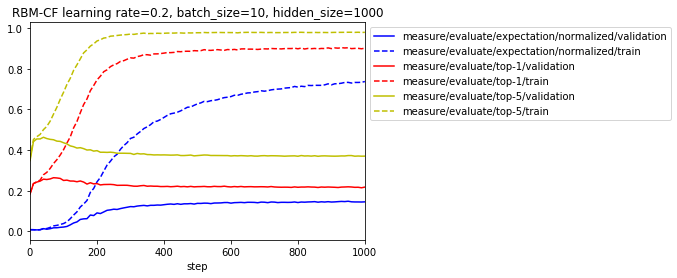

In [218]:
def filter_df(df, filters):
    '''
    results = None
    for k, v in filters.items():
        if results is None:
            results = df[k] == v
        else:
            results &= df[k] == v

    return results
    '''
    return (df[list(filters)] == pd.Series(filters)).all(axis=1)

filters = {
    'class': 'RBMCF',
    'learning_rate': 'ConstantLearningRate-0.2',
    'batch_size': 10,
    'momentum': 1,
    'sampling_method': 'CD-1',
    'hidden_size': 1000
}
model = 'RBMCF'

columns = [
    'measure/evaluate/expectation/normalized/validation',
    'measure/evaluate/expectation/normalized/train',
    'measure/evaluate/top-1/validation',
    'measure/evaluate/top-1/train',
    'measure/evaluate/top-5/validation',
    'measure/evaluate/top-5/train',
    
    #'measure/evaluate/top-5/RMSE_train',
    #'measure/evaluate/top-5/RMSE_validation',
    #'measure/evaluate/top-1/train',
    #'measure/evaluate/top-1/validation'
]
styles=['b', 'b--', 'r-', 'r--', 'y', 'y--']

ax = data[filter_df(data, filters)].groupby(['step']).mean()[columns].plot(style=styles)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM-CF learning rate=0.2, batch_size=10, hidden_size=1000');

#data[filter_df(data, filters)][columns].sort_values(['step', 'kfold'])#.iloc[0]

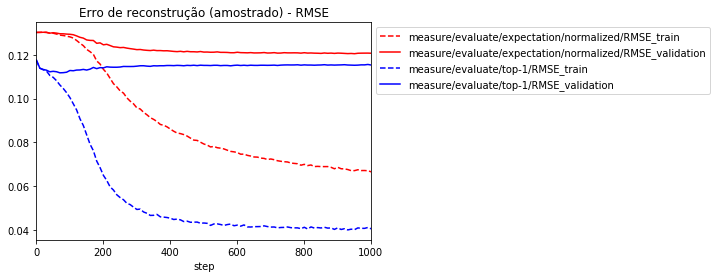

In [222]:
columns = [
    'measure/evaluate/expectation/normalized/RMSE_train',
    'measure/evaluate/expectation/normalized/RMSE_validation',
    #'measure/evaluate/top-5/RMSE_train',
    #'measure/evaluate/top-5/RMSE_validation',
    'measure/evaluate/top-1/RMSE_train',
    'measure/evaluate/top-1/RMSE_validation',
    #'measure/evaluate/top-1/train',
    #'measure/evaluate/top-1/validation'
]

styles=['r--', 'r', 'b--', 'b', ]

ax = data[filter_df(data, filters)].groupby(['step']).mean()[columns].plot(style=styles)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Erro de reconstrução (amostrado) - RMSE');

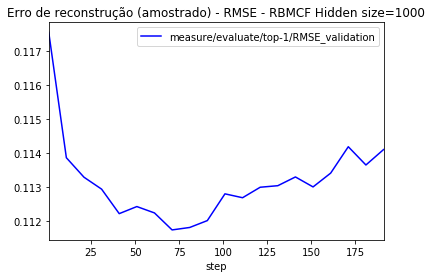

In [221]:
columns = [
    #'measure/evaluate/expectation/normalized/RMSE_train',
    #'measure/evaluate/expectation/normalized/RMSE_validation',
    #'measure/evaluate/top-5/RMSE_train',
    #'measure/evaluate/top-5/RMSE_validation',
    #'measure/evaluate/top-1/RMSE_train',
    'measure/evaluate/top-1/RMSE_validation',
    #'measure/evaluate/top-1/train',
    #'measure/evaluate/top-1/validation'
]

styles=['b', 'r']

ax = data[filter_df(data, filters) & (data['step']<200)].groupby(['step']).mean()[columns].plot(style=styles)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Erro de reconstrução (amostrado) - RMSE - RBMCF Hidden size=1000');

# Best hyperparameters

In [149]:
def evaluate(column):
    parameters = ['class', 'hidden_size', 'learning_rate', 'kfold', 'kfold-intern']

    result = data \
        .groupby(parameters).max(level=column) \
        .groupby(parameters[:-1]).mean() \
        .groupby(parameters[:-2]).mean()[[column]].reset_index()
    
    result.rename(columns={column: 'mean'}, inplace=True)
    result['type'] = column
    return result

columns_evaluated = ['measure/evaluate/expectation/normalized/validation', 'measure/evaluate/top-5/validation', 'measure/evaluate/top-1/validation']

evaluation = pd.concat([evaluate(column) for column in columns_evaluated])
evaluation.head(3)
#print(accuracy.max(), accuracy.max().index)

,class,hidden_size,learning_rate,mean,type
0,RBM,100,ConstantLearningRate-0.01,0.069885,measure/evaluate/expectation/normalized/valida...
1,RBM,100,ConstantLearningRate-0.05,0.068611,measure/evaluate/expectation/normalized/valida...
2,RBM,100,ConstantLearningRate-0.1,0.081819,measure/evaluate/expectation/normalized/valida...


In [188]:
print("WRONG!!!")
evaluation.groupby(['type', 'class']).max().sort_values('mean', ascending=False)


WRONG!!!


hidden_size  \
type                                               class                
measure/evaluate/top-5/validation                  RBMCF         1000   
                                                   RBM           1000   
measure/evaluate/top-1/validation                  RBMCF         1000   
                                                   RBM           1000   
measure/evaluate/expectation/normalized/validation RBMCF         1000   
                                                   RBM           1000   

                                                                     learning_rate  \
type                                               class                             
measure/evaluate/top-5/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/top-1/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/expectation/normalized/validation RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   

                                                              mean  
type                                               class            
measure/evaluate/top-5/validation                  RBMCF  0.467003  
                                                   RBM    0.459457  
measure/evaluate/top-1/validation                  RBMCF  0.271282  
                                                   RBM    0.263143  
measure/evaluate/expectation/normalized/validation RBMCF  0.158949  
                                                   RBM    0.118353

In [223]:
print('CORRECT!')

best_results = evaluation.groupby(['type', 'class', 'hidden_size', 'learning_rate']).max()
best_results.reset_index()\
    .sort_values('mean', ascending=False)\
    .drop_duplicates(['type', 'class'])\
    .set_index(['type', 'class'])
#best_results
#best_results#.idxmax()
#evaluation.groupby(['type', 'class']).max()

CORRECT!


hidden_size  \
type                                               class                
measure/evaluate/top-5/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/top-1/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/expectation/normalized/validation RBMCF          100   
                                                   RBM           1000   

                                                                      learning_rate  \
type                                               class                              
measure/evaluate/top-5/validation                  RBMCF   ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.05   
measure/evaluate/top-1/validation                  RBMCF   ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.05   
measure/evaluate/expectation/normalized/validation RBMCF   ConstantLearningRate-0.2   
                                                   RBM     ConstantLearningRate-0.1   

                                                              mean  
type                                               class            
measure/evaluate/top-5/validation                  RBMCF  0.467003  
                                                   RBM    0.459457  
measure/evaluate/top-1/validation                  RBMCF  0.271282  
                                                   RBM    0.263143  
measure/evaluate/expectation/normalized/validation RBMCF  0.158949  
                                                   RBM    0.118353

In [197]:
evaluation.groupby(['type', 'class', 'hidden_size', 'learning_rate'])\
    .max()\
    .reset_index()\
    .pivot_table(index=['type', 'class', 'learning_rate'], columns=['hidden_size'])

mean  \
hidden_size                                                                             100    
type                                               class learning_rate                         
measure/evaluate/expectation/normalized/validation RBM   ConstantLearningRate-0.01  0.069885   
                                                         ConstantLearningRate-0.05  0.068611   
                                                         ConstantLearningRate-0.1   0.081819   
                                                   RBMCF ConstantLearningRate-0.05  0.122763   
                                                         ConstantLearningRate-0.1   0.148219   
                                                         ConstantLearningRate-0.2   0.158949   
measure/evaluate/top-1/validation                  RBM   ConstantLearningRate-0.01  0.257946   
                                                         ConstantLearningRate-0.05  0.218056   
                                                         ConstantLearningRate-0.1   0.192223   
                                                   RBMCF ConstantLearningRate-0.05  0.261543   
                                                         ConstantLearningRate-0.1   0.259193   
                                                         ConstantLearningRate-0.2   0.263605   
measure/evaluate/top-5/validation                  RBM   ConstantLearningRate-0.01  0.446971   
                                                         ConstantLearningRate-0.05  0.389065   
                                                         ConstantLearningRate-0.1   0.382700   
                                                   RBMCF ConstantLearningRate-0.05  0.446816   
                                                         ConstantLearningRate-0.1   0.448593   
                                                         ConstantLearningRate-0.2   0.450285   

                                                                                              \
hidden_size                                                                             500    
type                                               class learning_rate                         
measure/evaluate/expectation/normalized/validation RBM   ConstantLearningRate-0.01  0.037323   
                                                         ConstantLearningRate-0.05  0.069446   
                                                         ConstantLearningRate-0.1   0.113220   
                                                   RBMCF ConstantLearningRate-0.05  0.093403   
                                                         ConstantLearningRate-0.1   0.133185   
                                                         ConstantLearningRate-0.2   0.155938   
measure/evaluate/top-1/validation                  RBM   ConstantLearningRate-0.01  0.252939   
                                                         ConstantLearningRate-0.05  0.262967   
                                                         ConstantLearningRate-0.1   0.225576   
                                                   RBMCF ConstantLearningRate-0.05  0.262681   
                                                         ConstantLearningRate-0.1   0.261607   
                                                         ConstantLearningRate-0.2   0.271282   
measure/evaluate/top-5/validation                  RBM   ConstantLearningRate-0.01  0.430295   
                                                         ConstantLearningRate-0.05  0.452435   
                                                         ConstantLearningRate-0.1   0.438126   
                                                   RBMCF ConstantLearningRate-0.05  0.451206   
                                                         ConstantLearningRate-0.1   0.459588   
                                                         ConstantLearningRate-0.2   0.467003   

                                                      

# Individual analisys

In [20]:
#columns = [f'details/measure/expectation/normalized/evaluate-{i}/validation' for i in range(6)]
columns = [f'details/measure/top-5/evaluate-{i}/validation' for i in range(6)]
full_columns = columns + ['measure/evaluate/expectation/normalized/train', 'measure/evaluate/expectation/normalized/validation'] \
             + ['measure/evaluate/top-1/validation', 'measure/evaluate/top-5/validation']

data[data["class"] == 'RBMCF'][full_columns].idxmax()

details/measure/top-5/evaluate-0/validation            4547
details/measure/top-5/evaluate-1/validation            7172
details/measure/top-5/evaluate-2/validation           12224
details/measure/top-5/evaluate-3/validation           10102
details/measure/top-5/evaluate-4/validation            1112
details/measure/top-5/evaluate-5/validation            3435
measure/evaluate/expectation/normalized/train          5246
measure/evaluate/expectation/normalized/validation    17977
measure/evaluate/top-1/validation                     10505
measure/evaluate/top-5/validation                     10306
dtype: int64

kfold=2/kfold-intern=1/batch_size=10/class=RBMCF/visible_size=702/hidden_size=100/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.2/sampling_method=CD-1/momentum=1/1542855678.6966267/events.out.tfevents.1542855682.paulo-notebook


Text(0.5, 1.0, 'RBM-CF - Best validation performance')

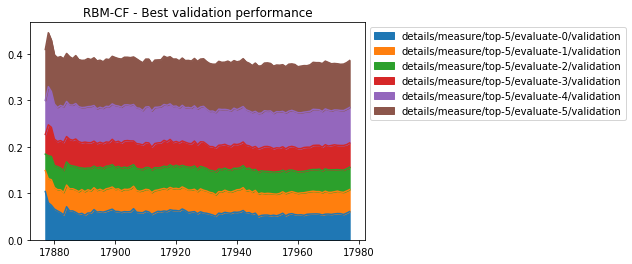

In [21]:
detail_filter = data.iloc[17977].path

print(detail_filter)
#ax = data[data['details'].str.contains(detail_filter)][full_columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM-CF - Best validation performance')

In [14]:
data[data["class"] == 'RBM'][full_columns].idxmax()

details/measure/expectation/normalized/evaluate-0/validation    11099
details/measure/expectation/normalized/evaluate-1/validation     5620
details/measure/expectation/normalized/evaluate-2/validation     9591
details/measure/expectation/normalized/evaluate-3/validation     7454
details/measure/expectation/normalized/evaluate-4/validation    11406
details/measure/expectation/normalized/evaluate-5/validation    11396
measure/evaluate/expectation/normalized/train                   11407
measure/evaluate/expectation/normalized/validation              11406
dtype: int64

kfold=4/kfold-intern=0/batch_size=10/class=RBM/visible_size=702/hidden_size=1000/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.1/sampling_method=CD-1/momentum=1/1542903493.2974353/events.out.tfevents.1542903497.ff69adec0143


Text(0.5, 1.0, 'RBM - Best validation performance')

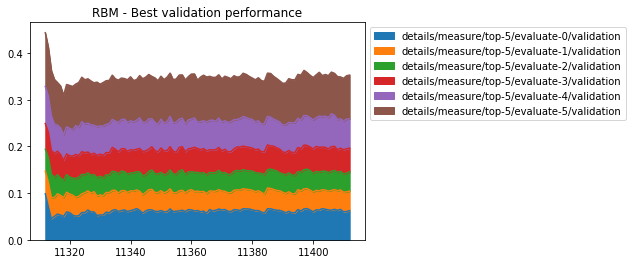

In [22]:
detail_filter = data.iloc[11406].path

print(detail_filter)
#ax = data[data['path'].str.contains(detail_filter)][columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Best validation performance')

In [19]:
#data[(data["class"] == 'RBM') & (data['path'].str.contains('id=50'))][full_columns].idxmax()

Text(0.5, 1.0, 'RBM - Validation performance to the best 5º effect in the last eppoch')

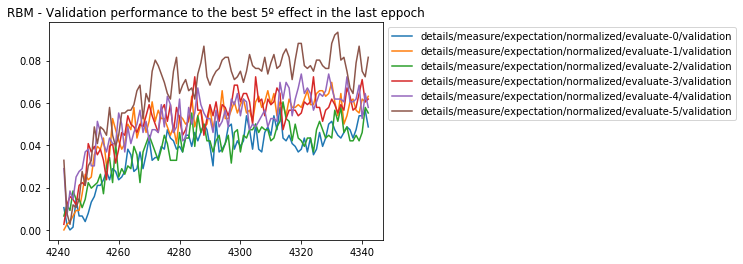

In [20]:
detail_filter = data.iloc[4278].path[7:]

ax = data[data['path'].str.contains(detail_filter)][columns].plot()
#ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Validation performance to the best 5º effect in the last eppoch')